<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 5: SARSA and Q-learning  </font></h1>





##  Content
1. Cliff walking example (50 points)
2. Cart pole example (50 points)



Import Gym and other necessary libraries

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display
import random

Populating the interactive namespace from numpy and matplotlib


# 1. Cliff-walk example

## 1.1 Intro to Cliff walk

In this section, we use SARSA and Q-learning algorithm to solve to a cliff walk problem. ( See Sutton&Barto Example 6.6 )

The grid is shown below, the black tiles represents wall/obstacles, the white tiles are the non-terminal tiles, and the tile with "s" is the starting point of every episoid, the tile with "G" is the goal point.

The agent start at "s" tile. At every step, the agent can choose one of the four actions:"up","right","down","left", moving to the next tile in that direction.

$\cdot$ If the next tile is wall/obstacle, the agent does not move and receive -1 reward;

$\cdot$ If the next tile is a non-terminal tile, the agent move to that tile and receive 0 reward;

$\cdot$ If the next tile is the goal tile, the episoid is finished and the agent receive 100 reward (set to be 100 to accelarate the training).

$\cdot$ If the next tile is the cliff, the episoid is finished and the agent receive -100 reward ;

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


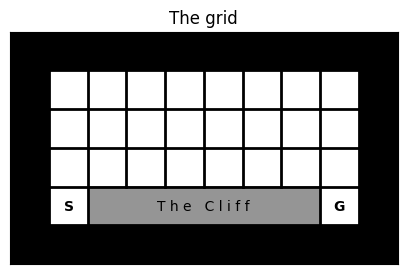

In [2]:
from gridworld2 import GridWorld

gw = GridWorld()
gw.plot_grid(plot_title='The grid')

### States and state values
Excluding the wall around the grid, there are 32 tiles (INCLUDING obstacles inside the grid), and they correspond to 32 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 24 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

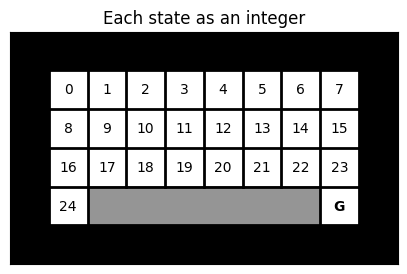

In [3]:
gw.plot_state_values(np.arange(25),value_format="{:d}",plot_title='Each state as an integer')

### Taking actions
Use GridWorld.step(action) to take an action, and use GridWorld.reset() to restart an episoid

action is an integer from 0 to 3

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left"

In [4]:
gw.reset()

current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)

print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)

print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episode")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



The current state is 24, which corresponds to tile position (3, 0)

Take action 3, get reward -1, move to state 24
Now the current state is 24, which corresponds to tile position (3, 0)

Reset episode
Now the current state is 24, which corresponds to tile position (3, 0)


### Plotting Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (32,)-numpy array whose entries are all integers in (0-3)

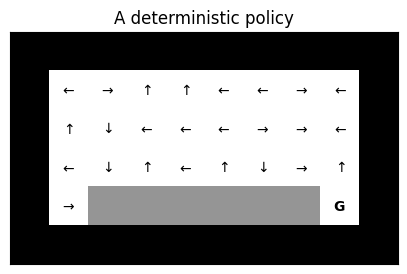

In [5]:
gw.plot_policy(np.random.randint(4,size=(32,)),plot_title='A deterministic policy')

## 1.2 SARSA & Q_learning

You will now implement Sarsa and Q learning

In [6]:
## Suggested functions (Feel free to modify existing and add new functions)

def update_Q(Q, current_idx, next_idx, current_action, next_action, alpha, R, gamma):
    # Update Q at the each step
    #
    # input:  current Q,                    (array)
    #         current_idx, next_idx         (array)  states
    #         current_action, next_action   (array)  actions
    #         alpha, R, gamma               (floats) learning rate, reward, discount rate
    # output: Updated Q
    Q[current_idx, current_action] += alpha * (R + gamma * Q[next_idx, next_action] - Q[current_idx, current_action])
    return Q

def get_action(current_idx, Q, epsilon):
    # Choose optimal action based on current state and Q
    #
    # input:  current_idx     (array)
    #         Q,              (array)
    #         epsilon,        (float)
    # output: action
    if np.random.rand() < epsilon:
      action = np.random.randint(Q.shape[1])
    else:
      action = np.argmax(Q[current_idx])
    return action

### [Task] 1.2.1 SARSA [Coding: 20 points]

* Implement SARSA (See Sutton&Barto Section 6.4) on this example for 5000 episodes to learn the optimal policy.
* Plot the greedy policy of the learned Q-function using gw.plot_policy()

In [7]:
## Suggested flow (Feel free to modify and add)
## SARSA
Q  = np.zeros((25,4))

gw.reset()

max_ep = 5000

total_reward_sarsa = np.zeros(max_ep)

epsilon = 0.1
alpha = 0.5
gamma = 0.9

for ep in range(0, max_ep):
    gw.reset()
    terminated = False
    current_state = gw.get_current_state()
    current_action = get_action(current_state,Q,epsilon)
    while terminated == False:
        reward, terminated, next_state = gw.step(current_action)
        if not reward == 100: total_reward_sarsa[ep] += reward
        next_action = get_action(next_state,Q,epsilon)

        Q = update_Q(Q, current_state, next_state, current_action, next_action, alpha, reward, gamma)

        current_state = next_state
        current_action = next_action

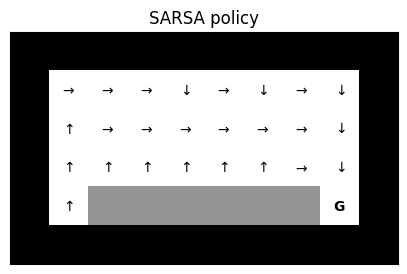

In [8]:
gw.plot_policy(np.argmax(Q, axis=1),plot_title='SARSA policy')

### [Task] 1.2.2 Q-learning [Coding: 20 points]
* Implement Q_learning algorithm (See Sutton&Barto Section 6.5) on this example for 5000 episodes to learn the optimal policy.
* Plot the greedy policy of the learned Q-function using gw.plot_policy()



In [9]:
## Suggested flow (Feel free to modify and add)
## Q_learning
Q  = np.zeros((25,4))

gw.reset()

max_ep = 5000

total_reward_qlearning = np.zeros(max_ep)

epsilon = 0.1
alpha = 0.5
gamma = 0.9

for ep in range(0, max_ep):
    gw.reset()
    terminated = False
    current_state = gw.get_current_state()
    while terminated == False:
        current_action = get_action(current_state,Q,epsilon)
        reward, terminated, next_state = gw.step(current_action)
        if not reward == 100: total_reward_qlearning[ep] += reward
        max_action = get_action(next_state,Q,0)

        Q = update_Q(Q, current_state, next_state, current_action, max_action, alpha, reward, gamma)

        current_state = next_state

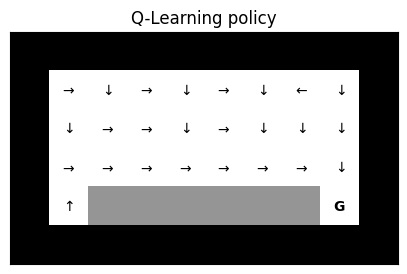

In [10]:
gw.plot_policy(np.argmax(Q, axis=1),plot_title='Q-Learning policy')

### [Task 1.2.3] Comparison [Coding/Question 10 points]
* Plot the total rewards during one episode v.s. number of episodes trained for both SARSA and Q-Learning.

* Compare your plot to the one in [Sutton & Barto Figure 6.4].

* Which algorithm obtains bette performance? Provide some intuition on why this is the case.

(Optional)You may  

1. Smooth your curve by taking the average of total rewards over successive 50 episodes
2. Avoid adding the artificial "+100" goal reward to the total reward to match you figure with the book (Although we need to used goal reward when update the Q-function )



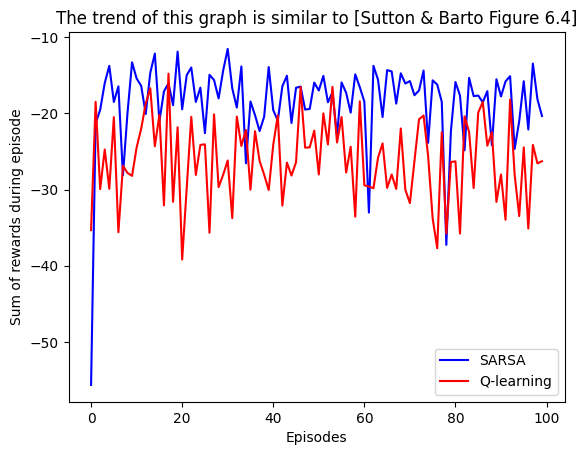

In [11]:
total_reward_sarsa_plt, total_reward_qlearning_plt = [], []
i = 0
smooth_level = 50
while i <= max_ep - smooth_level:
  total_reward_sarsa_plt.append(np.mean(total_reward_sarsa[i:i+smooth_level]))
  total_reward_qlearning_plt.append(np.mean(total_reward_qlearning[i:i+smooth_level]))
  i += smooth_level

steps = np.arange(len(total_reward_sarsa_plt))
plt.plot(steps, total_reward_sarsa_plt, label = "SARSA", color = "blue")
plt.plot(steps, total_reward_qlearning_plt, label = "Q-learning", color = "red")
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards during episode")
plt.title("The trend of this graph is similar to [Sutton & Barto Figure 6.4]")
plt.legend()
plt.show()

***Your written answer/comparison here***

SARSA performs better than Q-learning. This is because Q-learning is based on $\epsilon$-greedy action selection, which will choose the optimal path but have a high chance of falling off the cliff (more exploitation). In contrast, SARSA considers the action selection with next state and learns the longer but safer path through the upper part of the grid (more exploration).



# 2. CartPole-v1

## 2.1 CartPole Introduction

We now use SARSA and Q-learning on the CartPole problem.


1. A pole is attached via an un-actuated joint to a cart, which moves along a frictionless track.

0. The system is controlled by applying a force of +1 or -1 to the cart.

0. The pole starts at upright position, and the goal is to prevent it from falling over.

0. A reward of +1 is obtained for every timestep that the pole remains upright.

0. The episode ends when the pole is more than 15 degrees from the vertical, or the cart moves more than 2.4 units from the center.

0. For more info (See [SOURCE ON GITHUB](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)).

The following examples show the basic usage of this testing environment:



### Episode initialization and Initial Value

In [12]:
env = gym.make('CartPole-v0')
observation = env.reset() ##Initial an episode
if gym.__version__>'0.26.0':
    observation = observation[0]

print("Inital observation is {}".format(observation))

print("\nThis means the cart current position is {}".format(observation[0]), end = '')
print(" with velocity {},".format(observation[1]))

print("and the pole current angular position is {}".format(observation[2]), end = '')
print(" with angular velocity {},".format(observation[3]))


Inital observation is [ 0.00747368  0.02176253 -0.0091531   0.04791264]

This means the cart current position is 0.007473675534129143 with velocity 0.021762531250715256,
and the pole current angular position is -0.009153102524578571 with angular velocity 0.04791264235973358,


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### Taking actions


Use env.step(action) to take an action

action is an integer from 0 to 1

0: "Left"; 1: "Right"

In [13]:
print("Current observation is {}".format(observation))

action = 0 #go left
#################### simulate one step
if gym.__version__>'0.26.0':
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
else:
    observation, reward, done, info = env.step(action)
####################

print("\nNew observation is {}".format(observation))
print("Step reward is {}".format(reward))
print("Did episode just ends? -{}".format(done)) # episode ends when 3.1(6) happens



Current observation is [ 0.00747368  0.02176253 -0.0091531   0.04791264]

New observation is [ 0.00790893 -0.17322698 -0.00819485  0.3376937 ]
Step reward is 1.0
Did episode just ends? -False


### Simulating multiple episodes

(You may uncomment those lines to see an animation. However, it will not work for JupyterHub since the animation requires GL instead of webGL. If you have Jupyter notebook localy on your computer, this version of code will work through a virtual frame.)

In [14]:
env = gym.make('CartPole-v0')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]
total_reward = 0
ep_num = 0
# img = plt.imshow(env.render(mode='rgb_array'))


for _ in range(1000):
    #     img.set_data(env.render(mode='rgb_array'))
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)

    action = env.action_space.sample()     # this takes random actions
    #################### simulate one step
    if gym.__version__>'0.26.0':
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        observation, reward, done, info = env.step(action)
    ####################

    total_reward += reward



    if done:                               # episode just ends
        observation = env.reset()          # reset episode
        if gym.__version__>'0.26.0':
            observation = observation[0]
        ep_num += 1

print("Average reward per episode is {}".format(total_reward/ep_num))
env.close()


Average reward per episode is 22.727272727272727


### 2.1.1 States Discretization

The class DiscreteObs() discretizes the observation space into discrete state space, based on numpy.digitize (Please read its description in https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)

Discretization of observation space is necessary for tabular methods. You can use DiscreteObs() or any other library for discretizing the observation space.

In [15]:
class DiscretObs():


    def __init__(self, bins_list):
        self._bins_list = bins_list

        self._bins_num = len(bins_list)
        self._state_num_list = [len(bins)+1 for bins in bins_list]
        self._state_num_total = np.prod(self._state_num_list)

    def get_state_num_total(self):

        return self._state_num_total

    def _state_num_list(self):

        return self._state_num_list

    def obs2state(self, obs):

        if not len(obs)==self._bins_num:
            raise ValueError("observation must have length {}".format(self._bins_num))
        else:
            return [np.digitize(obs[i], bins=self._bins_list[i]) for i in range(self._bins_num)]

    def obs2idx(self, obs):

        state = self.obs2state(obs)

        return self.state2idx(state)

    def state2idx(self, state):

        idx = 0
        for i in range(self._bins_num-1,-1,-1):
            idx = idx*self._state_num_list[i]+state[i]

        return idx

    def idx2state(self, idx):

        state = [None]*self._bins_num
        state_num_cumul = np.cumprod(self._state_num_list)
        for i in range(self._bins_num-1,0,-1):
            state[i] = idx//state_num_cumul[i-1]
            idx -=state[i]*state_num_cumul[i-1]
        state[0] = idx%state_num_cumul[0]

        return state

# Recommended epsilon and learning_rate update (Feel free to modify existing and add new functions)
def get_epsilon(t):
    return max(0.1, min(1., 1. - math.log10((t + 1) / 25)))

def get_learning_rate(t):
    return max(0.1, min(1., 1. - math.log10((t + 1) / 25)))



# Recommended Discretization for Carpole-v1 when using Monte-Carlo methods
bins_pos = []                                       # position
bins_d_pos = []                                     # velocity
bins_ang = np.linspace(-0.41887903,0.41887903,5)    # angle
bins_d_ang = np.linspace(-0.87266,0.87266,11)       # angular velocity

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

state = dobs.obs2state(observation)

idx = dobs.state2idx(state)


print("Current position of the cart is {:.4f}\n".format(observation[0]))
print("Current velocity of the cart is {:.4f}\n".format(observation[1]))
print("Current angular position of the pole is {:.4f} rad\n".format(observation[2]))
print("Current angular velocity of the pole is {:.4f} rad\n".format(observation[3]))

print("which are mapped to state {}, with corresponding index {}".format(state,idx))
print("index {} maps to state{}".format(idx,dobs.idx2state(idx)))


Current position of the cart is -0.0098

Current velocity of the cart is -0.0416

Current angular position of the pole is 0.0392 rad

Current angular velocity of the pole is -0.0220 rad

which are mapped to state [0, 0, 3, 5], with corresponding index 33
index 33 maps to state[0, 0, 3, 5]


## 2.2 SARSA & Q_learning

In [16]:
## Suggested functions (Feel free to modify existing and add new functions)

def update_Q(Q, current_idx, next_idx, current_action, next_action, alpha, R, gamma):
    # Update Q at the each step
    #
    # input:  current Q,                    (array)
    #         current_idx, next_idx         (array)  states
    #         current_action, next_action   (array)  actions
    #         alpha, R, gamma               (floats) learning rate, reward, discount rate
    # output: Updated Q
    Q[current_idx, current_action] += alpha * (R + gamma * Q[next_idx, next_action] - Q[current_idx, current_action])
    return Q

def get_action(current_idx, Q, epsilon):
    # Choose optimal action based on current state and Q
    #
    # input:  current_idx     (array)
    #         Q,              (array)
    #         epsilon,        (float)
    # output: action
    if np.random.rand() < epsilon:
      action = np.random.randint(Q.shape[1])
    else:
      action = np.argmax(Q[current_idx])
    return action

### [Task 2.2.1] SARSA [Coding, 20 points]

Implement SARSA algorithm (See Sutton&Barto Section 6.4) on this example for 1000 episodes to learn the optimal policy.

In [17]:
## Suggested flow (Feel free to modify and add)
## SARSA
total_reward = 0

bins_pos = []
bins_d_pos = []
bins_ang = np.linspace(-0.41887903,0.41887903,5)
bins_d_ang = np.linspace(-0.87266,0.87266,11)

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])

env = gym.make('CartPole-v1')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

# Q defined by states
# Q = np.zeros((2,dobs._state_num_list[0],dobs._state_num_list[1],dobs._state_num_list[2],dobs._state_num_list[3]))
# Q defined by index
Q = np.zeros((dobs.get_state_num_total(), 2))

count = 0

gamma = 0.98
result = np.zeros(50)
s = 0
for ep in range(1000):
    if  np.mod(ep,20)==0:
        result[s] = total_reward/20
        s+=1
        total_reward = 0

    observation = env.reset()
    if gym.__version__>'0.26.0':
        observation = observation[0]

#     current_state = dobs.obs2state(observation)
    current_idx = dobs.obs2idx(observation)

    alpha = get_learning_rate(ep)
    epsilon = get_epsilon(ep)

    done = False

    while not done:
        total_reward += 1
        action = get_action(current_idx, Q, epsilon)
        #################### simulate one step
        if gym.__version__>'0.26.0':
            observation, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        else:
            observation, reward, done, info = env.step(action)
        ####################

        next_idx = dobs.obs2idx(observation)
#         next_state =
        next_action = get_action(next_idx, Q, epsilon)

        Q = update_Q(Q, current_idx, next_idx, action, next_action, alpha, reward, gamma)
        current_idx = next_idx
        action = next_action

### [Task 2.2.2] Coding [10 points]
Divide the 1000 traing episodes into 50 sets. Plot the average reward for each set. (i.e. plot the average reward for the first 20 episodes, the second 20 episodes, ..., and the 50th 20 episodes.)



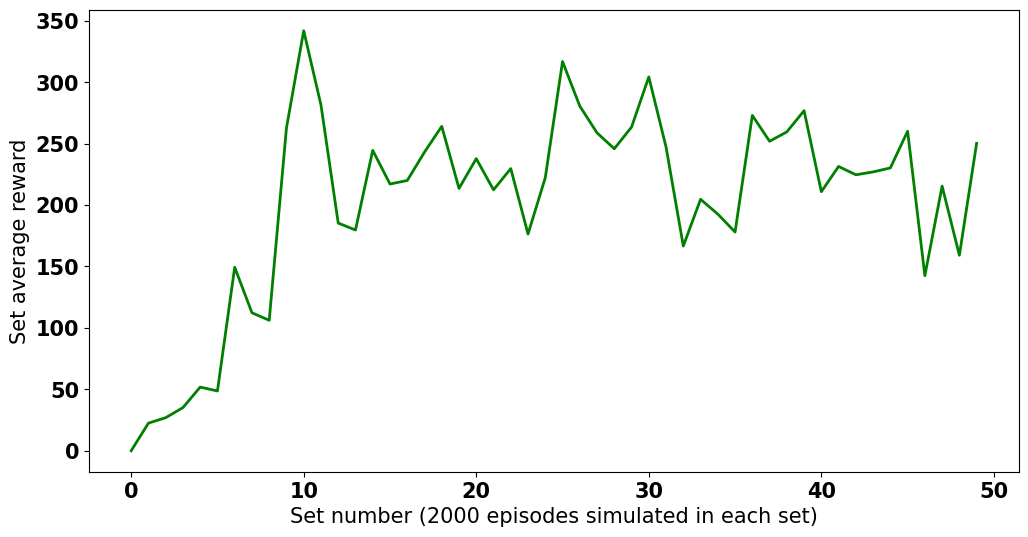

In [18]:
# Your code here
font = {'weight' : 'bold',
'size' : 15}
matplotlib.rc('font', **font)
figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(0, len(result)), result, linewidth=2, color='g')
plt.ylabel("Set average reward");
plt.xlabel("Set number (2000 episodes simulated in each set)");

### [Task 2.2.3] Q-learning [Coding, 20 points]

Implement Q_learning algorithm (See Sutton&Barto Section 6.5) on this example for 1000 episodes to to learn the optimal policy.

In [19]:
## Suggested flow (Feel free to modify and add)
## Q_learning
total_reward = 0

bins_pos = []
bins_d_pos = []
bins_ang = np.linspace(-0.41887903,0.41887903,5)
bins_d_ang = np.linspace(-0.87266,0.87266,11)

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])

env = gym.make('CartPole-v1')
observation = env.reset()
if gym.__version__>'0.26.0':
    observation = observation[0]

# Q defined by states
# Q = np.zeros((2,dobs._state_num_list[0],dobs._state_num_list[1],dobs._state_num_list[2],dobs._state_num_list[3]))
# Q defined by index
Q = np.zeros((dobs.get_state_num_total(), 2))

gamma = 0.98
result = np.zeros(50)
s = 0
for ep in range(1000):
    if  np.mod(ep,20)==0:
        result[s] = total_reward/20
        s+=1
        total_reward = 0

    observation = env.reset()
    if gym.__version__>'0.26.0':
        observation = observation[0]

#     current_state = dobs.obs2state(observation)
    current_idx = dobs.obs2idx(observation)

    alpha = get_learning_rate(ep)
    epsilon = get_epsilon(ep)

    done = False

    while not done:
        total_reward += 1
        action = get_action(current_idx, Q, epsilon)
        #################### simulate one step
        if gym.__version__>'0.26.0':
            observation, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        else:
            observation, reward, done, info = env.step(action)
        ####################

        next_idx = dobs.obs2idx(observation)
#         nex_state =
        max_action = get_action(next_idx,Q,0)

        Q = update_Q(Q, current_idx, next_idx, action, max_action, alpha, reward, gamma)
        current_idx = next_idx

### [Task 2.2.4] Coding [10 points]
Divide the 1000 traing episodes into 50 sets. Plot the average reward for each set. (i.e. plot the average reward for the first 20 episodes, the second 20 episodes, ..., and the 50th 20 episodes.)

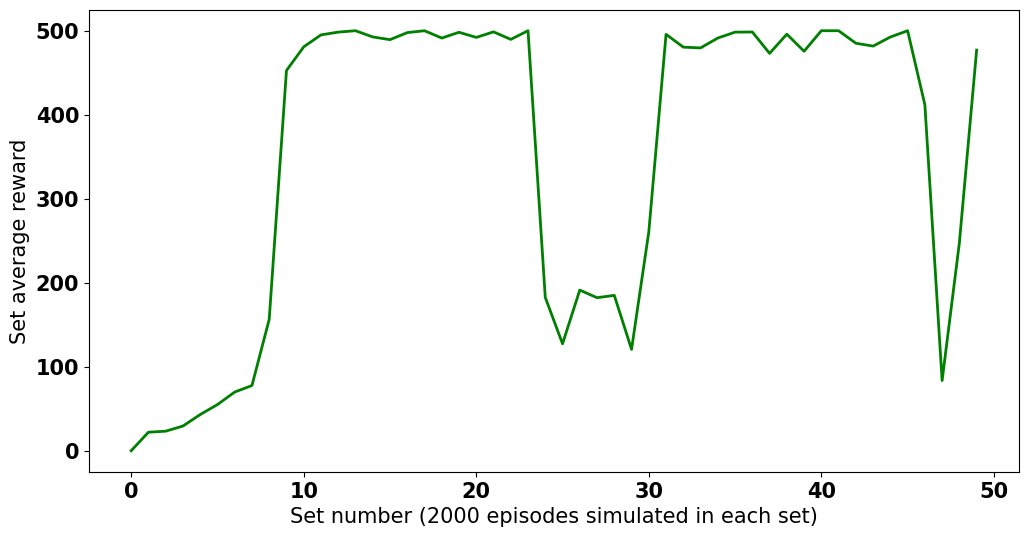

In [20]:
# Your code here
font = {'weight' : 'bold',
'size' : 15}
matplotlib.rc('font', **font)
figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(0, len(result)), result, linewidth=2, color='g')
plt.ylabel("Set average reward");
plt.xlabel("Set number (2000 episodes simulated in each set)");